In [71]:
import pandas as pd
import numpy as np
import joblib
import time

import matplotlib.pyplot as plt
import seaborn as sns

# for regular ml models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# for deep neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# get the data
xData = pd.read_csv("data/xData.csv")
yData = pd.read_csv("data/yData.csv")

In [3]:
xData.head()

,2830203.2,2830406.5,2830610,2830813.2,2831016.5,2831219.8,2831423,2831626.2,2831829.8,2832033,...,2902373.8,2902577,2902780.2,2902983.5,2903186.8,2903390,2903593.5,2903796.8,2904000,2905529.5
0,0.999474,0.998869,0.998569,0.998574,0.998578,0.998278,0.998587,0.998592,0.997379,0.997992,...,1.001447,0.999634,0.999960,1.000287,0.999085,0.998494,0.999433,0.999453,0.998252,0.997800
1,1.001642,1.001086,1.001074,1.000790,1.000506,1.000495,1.000211,1.001836,1.000189,0.999632,...,0.996737,0.997008,1.000000,1.002447,0.999726,0.998093,0.996733,0.996732,0.998092,1.002985
2,0.998800,0.999059,0.998814,0.998821,0.998576,0.999339,0.998339,0.998598,0.998354,0.998613,...,0.999354,0.998871,0.998388,0.998918,1.000461,0.998965,0.998989,0.999519,0.999289,0.999469
3,1.002387,1.001545,0.998737,1.000425,1.002112,1.002675,0.998462,1.004083,1.002398,0.999029,...,1.000665,0.998979,0.998417,0.998136,0.998135,0.997854,0.999821,0.997854,0.998135,0.998415
4,1.000740,0.999532,0.998934,1.000469,0.999261,0.999272,0.998674,0.999600,0.997782,0.999317,...,0.999488,0.999808,1.001048,1.000450,1.000770,1.000172,0.999881,1.001120,1.000828,1.000326


In [4]:
yData.head()

,-1,-1.1,-1.2
0,0.326,0.796,0.701
1,0.578,0.064,0.380
2,0.703,0.407,0.447
3,0.824,0.833,0.185
4,0.115,0.090,0.760


In [5]:
xData.describe().T

,count,mean,std,min,25%,50%,75%,max
2830203.2,22775.0,1.000192,0.001190,0.988728,0.999658,1.000233,1.000768,1.019918
2830406.5,22775.0,1.000083,0.001238,0.987363,0.999554,1.000158,1.000705,1.019832
2830610,22775.0,1.000002,0.001281,0.987284,0.999466,1.000093,1.000648,1.019749
2830813.2,22775.0,0.999936,0.001336,0.986177,0.999402,1.000056,1.000627,1.019311
2831016.5,22775.0,0.999848,0.001384,0.986870,0.999308,0.999992,1.000573,1.018873
...,...,...,...,...,...,...,...,...
2903390,22775.0,0.998676,0.001490,0.967566,0.998273,0.998990,0.999484,1.009432
2903593.5,22775.0,0.998691,0.001472,0.967560,0.998287,0.998990,0.999489,1.009563
2903796.8,22775.0,0.998709,0.001455,0.967554,0.998303,0.999009,0.999499,1.008759
2904000,22775.0,0.998720,0.001452,0.969140,0.998312,0.999021,0.999506,1.011076


In [6]:
yData.describe().T

,count,mean,std,min,25%,50%,75%,max
-1,22775.0,0.502002,0.287580,0.0,0.255,0.507,0.748,1.0
-1.1,22775.0,0.502028,0.287705,0.0,0.253,0.501,0.749,1.0
-1.2,22775.0,0.499581,0.289258,0.0,0.249,0.499,0.749,1.0


In [7]:
print("for xData")
print(f"Number of rows: {len(xData)}")
print(f"Number of cols: {len(xData.columns)}")
print("##########################################")
print("for yData")
print(f"Number of rows: {len(yData)}")
print(f"Number of cols: {len(yData.columns)}")

for xData
Number of rows: 22775
Number of cols: 365
##########################################
for yData
Number of rows: 22775
Number of cols: 3


In [8]:
# Rename columns of xData for clarity
xData.columns = [f'col{i+1}' for i in range(xData.shape[1])]
print(xData.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10',
       ...
       'col356', 'col357', 'col358', 'col359', 'col360', 'col361', 'col362',
       'col363', 'col364', 'col365'],
      dtype='object', length=365)


In [9]:
# rename columns of yData for clarity
yData.columns = ['x', 'y', 'z']
print(yData.columns)

Index(['x', 'y', 'z'], dtype='object')


In [10]:
xData.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22775.0,1.000192,0.001190,0.988728,0.999658,1.000233,1.000768,1.019918
col2,22775.0,1.000083,0.001238,0.987363,0.999554,1.000158,1.000705,1.019832
col3,22775.0,1.000002,0.001281,0.987284,0.999466,1.000093,1.000648,1.019749
col4,22775.0,0.999936,0.001336,0.986177,0.999402,1.000056,1.000627,1.019311
col5,22775.0,0.999848,0.001384,0.986870,0.999308,0.999992,1.000573,1.018873
...,...,...,...,...,...,...,...,...
col361,22775.0,0.998676,0.001490,0.967566,0.998273,0.998990,0.999484,1.009432
col362,22775.0,0.998691,0.001472,0.967560,0.998287,0.998990,0.999489,1.009563
col363,22775.0,0.998709,0.001455,0.967554,0.998303,0.999009,0.999499,1.008759
col364,22775.0,0.998720,0.001452,0.969140,0.998312,0.999021,0.999506,1.011076


In [11]:
yData.describe().T

,count,mean,std,min,25%,50%,75%,max
x,22775.0,0.502002,0.287580,0.0,0.255,0.507,0.748,1.0
y,22775.0,0.502028,0.287705,0.0,0.253,0.501,0.749,1.0
z,22775.0,0.499581,0.289258,0.0,0.249,0.499,0.749,1.0


In [12]:
# save those datasets
xData.to_csv('data/xData_clean.csv', index=False)
yData.to_csv('data/yData_clean.csv', index=False)

In [13]:
# load the clean versions for processing
x_data = pd.read_csv("data/xData_clean.csv")
y_data = pd.read_csv("data/yData_clean.csv")

In [14]:
# split the data by 80/20
X = x_data
y = y_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Initialize models
models = {
    "random_forest_regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "ridge_regression": Ridge(alpha=1.0),
    "MLP_regressor": MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
}

In [50]:
# Train and evaluate each model
results = {}

In [51]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions and compute online metrics, performance index
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"Mean Squared Error": mse, "R^2 Score": r2, "Performance": end_time - start_time}
    
    # save the model
    joblib.dump(model, f"./models/{model_name}.joblib")

In [52]:
results_df = pd.DataFrame(results)
results_df

,random_forest_regressor,ridge_regression,MLP_regressor
Mean Squared Error,0.035503,0.056225,0.069046
R^2 Score,0.576768,0.330253,0.177037
Performance,0.141024,0.003069,0.015001


## deep neural network implementation

In [53]:
# Normalize the input data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [54]:
# Split normalized data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [55]:
# Define the DNN model
def create_optimized_dnn(input_dim):
    model = Sequential([
        Dense(1024, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='linear')  # 3 outputs (x, y, z)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [56]:
# Create the model
input_dim = X_train.shape[1]
dnn_model = create_optimized_dnn(input_dim)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-11-18 15:02:17.773386: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-18 15:02:17.774811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [57]:
# Add callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [58]:
# Train the model
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100


2024-11-18 15:02:39.723491: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-11-18 15:02:40.191970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 0.1645 - mae: 0.3010

2024-11-18 15:02:45.623586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 6s 39ms/step - loss: 0.1645 - mae: 0.3010 - val_loss: 0.1826 - val_mae: 0.3353 - lr: 0.0010
Epoch 2/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0689 - mae: 0.2088 - val_loss: 0.0732 - val_mae: 0.2211 - lr: 0.0010
Epoch 3/100
57/57 [==============================] - 1s 14ms/step - loss: 0.0584 - mae: 0.1920 - val_loss: 0.0528 - val_mae: 0.1834 - lr: 0.0010
Epoch 4/100
57/57 [==============================] - 1s 14ms/step - loss: 0.0531 - mae: 0.1827 - val_loss: 0.0475 - val_mae: 0.1726 - lr: 0.0010
Epoch 5/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0503 - mae: 0.1776 - val_loss: 0.0448 - val_mae: 0.1691 - lr: 0.0010
Epoch 6/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0480 - mae: 0.1739 - val_loss: 0.0423 - val_mae: 0.1622 - lr: 0.0010
Epoch 7/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0465 - mae: 0.1704 - val_loss: 0.0414 - val_mae: 0.1628 - lr: 0.00

In [68]:
# Evaluate the model
loss, mae = dnn_model.evaluate(X_test, y_test, verbose=0)

print(f"Optimized DNN Model Test Loss: {loss:.4f}")
print(f"Optimized DNN Model Test MAE: {mae:.4f}")

Optimized DNN Model Test Loss: 0.0271
Optimized DNN Model Test MAE: 0.1174


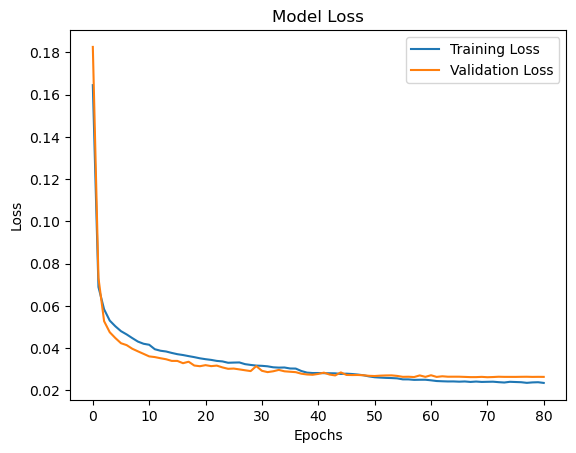

In [69]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
# save the model
dnn_model.save("./models/dnn.h5")

In [72]:
# load the test the performance agains x_test
loaded_dnn = load_model("./models/dnn.h5")

In [73]:
start_time = time.time()
dnn_predictions = loaded_dnn.predict(X_test)
end_time = time.time()

print(f"Deep Neural Network took {end_time - start_time} seconds")

 14/143 [=>............................] - ETA: 0s 

2024-11-18 15:11:33.775139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 1s 3ms/step
Deep Neural Network took 0.7515702247619629 seconds
